In [2]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np #import numpy library
import re # import library for regular expression
import random # import library for random number generation
import random # import library for random number generation

In [3]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv"

# Download the dataset locally
download(path, "recipes.csv")


We already placed the data on an IBM server for your convenience, so download the data from the server and read the data into a dataframe called recipes.

In [4]:
recipes = pd.read_csv("recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


In [5]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

<ipython-input-5-4a842aba65b0>:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0)


Now download and install more libraries and dependencies to build decision trees.

In [6]:
# import decision trees scikit-learn libraries

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# If running locally, you can try using the graphviz library but we'll use sklearn's plot_tree method
# !conda install python-graphviz --yes
# from sklearn.tree import export_graphviz

import itertools

Check the data again!

In [7]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

bamboo_tree] Only Asian and Indian Cuisines
Here, you are creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason this action is because the decision tree does not run well when the data is biased towards one cuisine or a group of cuisines, such as in this case, American cuisines. We can exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the second solution.

Let's build our decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree bamboo_tree.



In [8]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


Let's plot the decision tree and examine what the decision tree looks like.

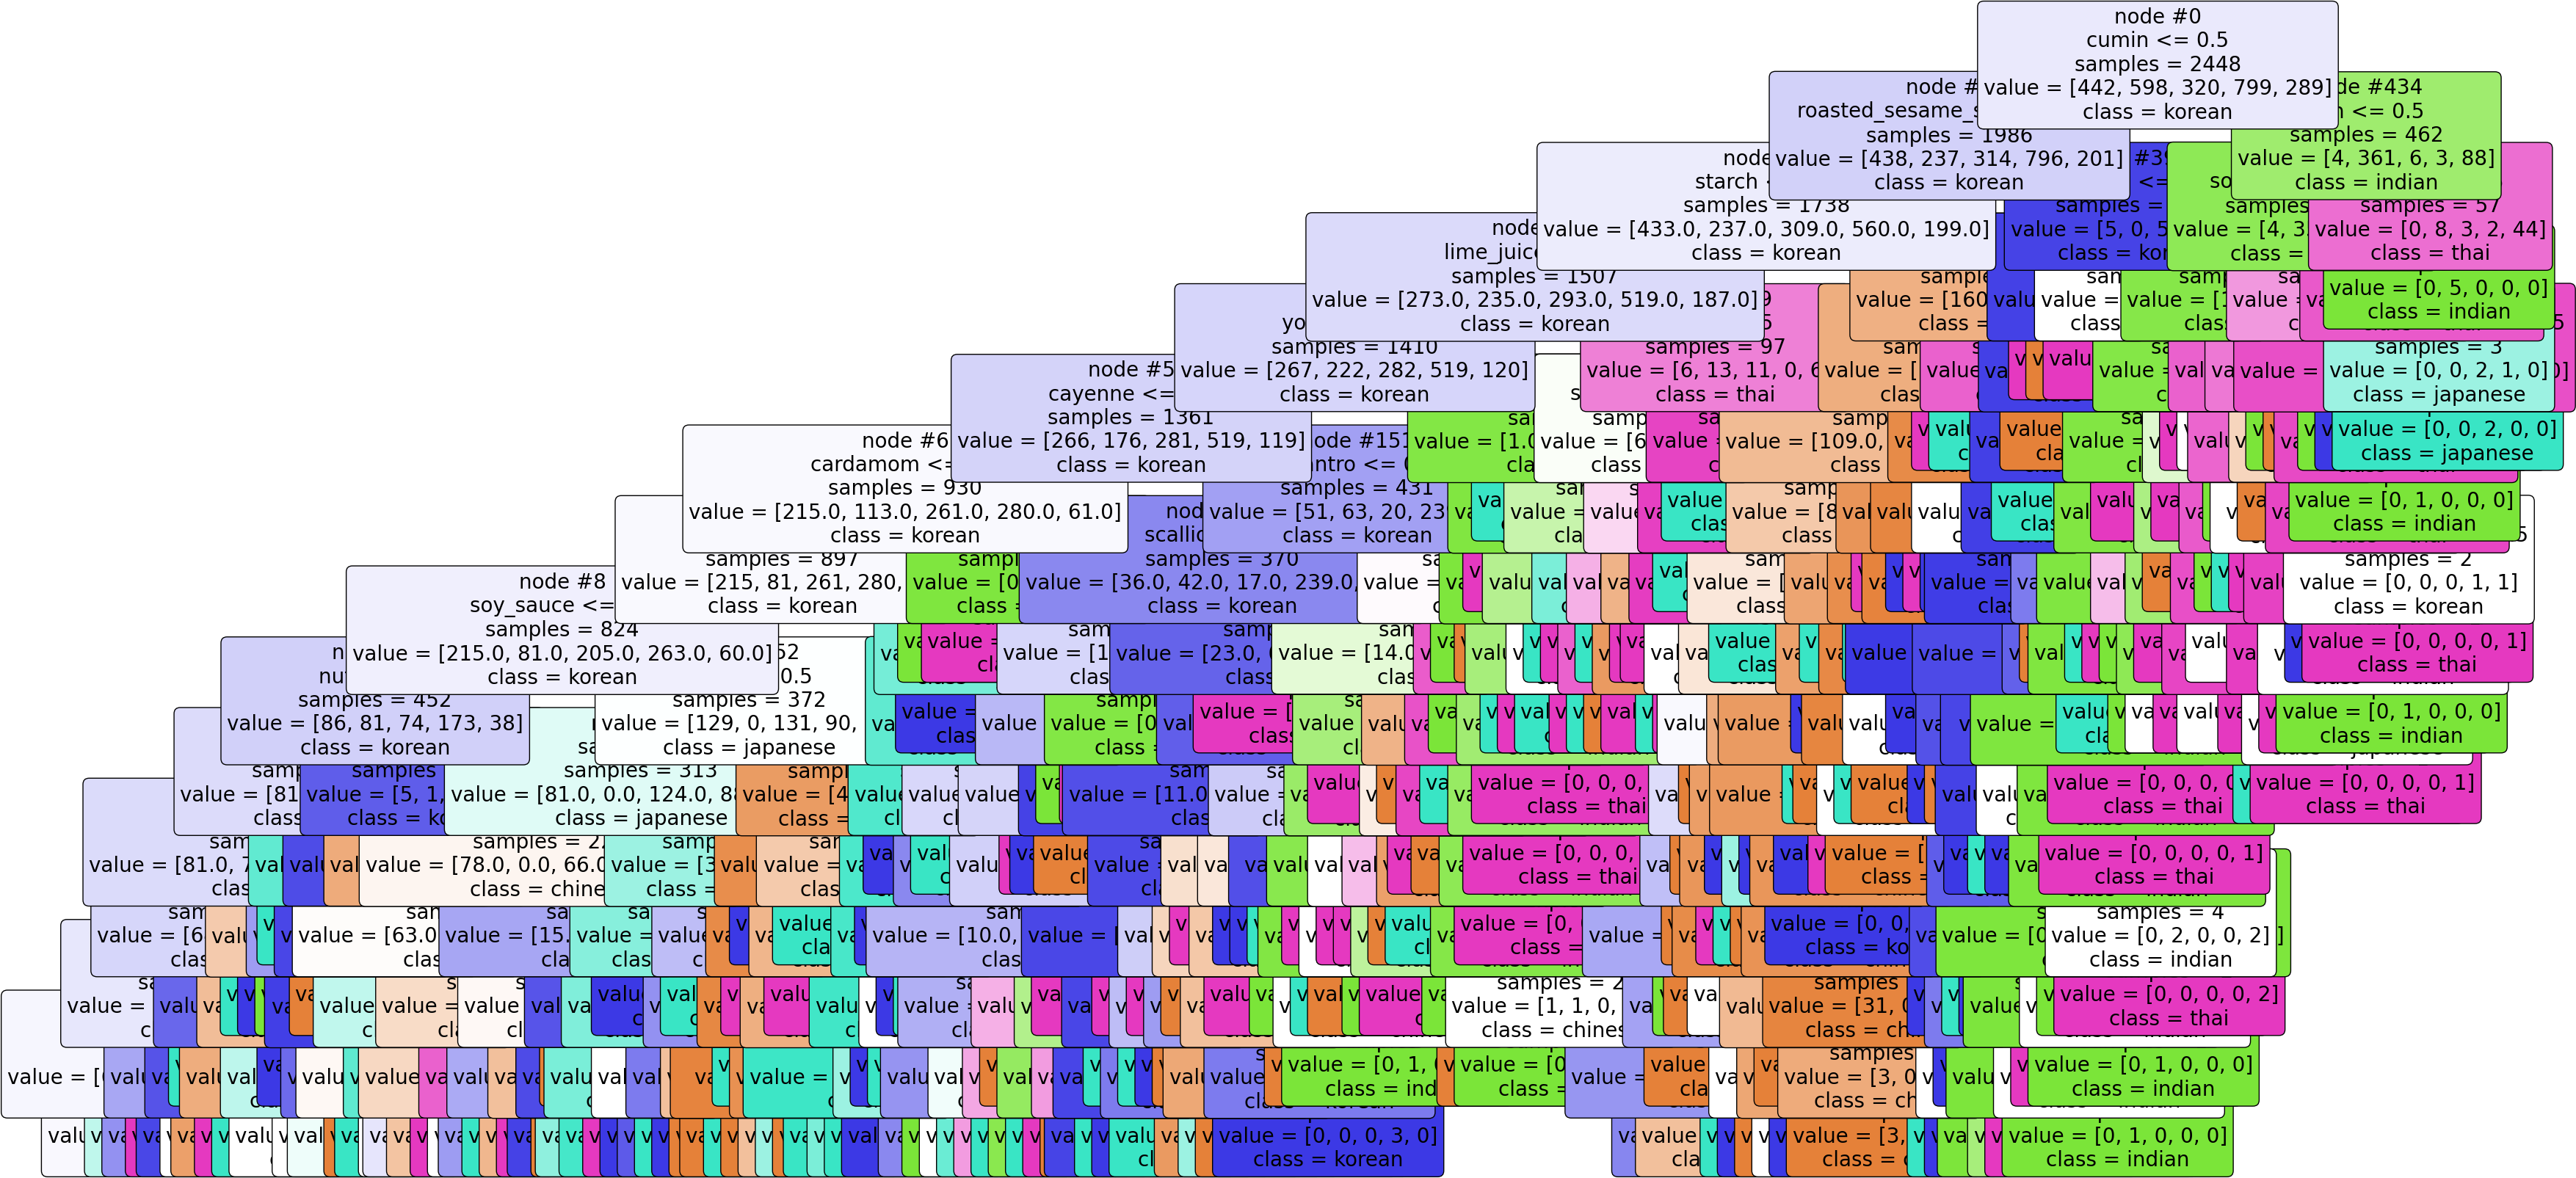

In [9]:
# if you're using the graphviz library, you can run these lines of code. Otherwise, this is configured to use plot_tree from sklearn
# export_graphviz(bamboo_tree,
#                 feature_names=list(ingredients.columns.values),
#                 out_file="bamboo_tree.dot",
#                 class_names=np.unique(cuisines),
#                 filled=True,
#                 node_ids=True,
#                 special_characters=True,
#                 impurity=False,
#                 label="all",
#                 leaves_parallel=False)

# with open("bamboo_tree.dot") as bamboo_tree_image:
#     bamboo_tree_graph = bamboo_tree_image.read()
# graphviz.Source(bamboo_tree_graph)

plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()


Next, to evaluate our model of Asian and Indian cuisines, you will split the data set into a training set and a test set. You will build the decision tree using the training set. Then, you will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines.

First create a new dataframe using only the data pertaining to the Asian and the Indian cuisines, and let's call the new dataframe bamboo.

In [10]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese","thai","indian"])]

Now see how many recipes exist for each cuisine.

In [11]:
bamboo["cuisine"].value_counts()

,count
cuisine,
korean,799
indian,598
chinese,442
japanese,320
thai,289


Let's remove 30 recipes from each cuisine to use as the test set, and let's name this test set bamboo_test.

In [12]:
# set sample size
sample_n = 30

Next, create a dataframe containing 30 recipes from each cuisine, selected randomly.

In [13]:
# take 30 recipes from each cuisine
# take 30 recipes from each cuisine

import random
random.seed(1234) #set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # create a dataframe of test set ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # create a series of test set cuisines
bamboo_test_cuisines = bamboo_test["cuisine"] # create a series of test set cuisines

<ipython-input-13-fd94af281d83>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))


Check that there are 30 recipes for each cuisine.

In [14]:
# Check that we have 30 recipes for each cuisine
bamboo_test["cuisine"].value_counts()

,count
cuisine,
chinese,30
indian,30
japanese,30
korean,30
thai,30


Now create the training set by removing the test set from the bamboo data set, and name the training set bamboo_train.

In [18]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:, 1:] #ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

Verify that there are 30 fewer recipes now for each cuisine.

In [19]:
bamboo_train["cuisine"].value_counts()

,count
cuisine,
korean,769
indian,568
chinese,412
japanese,290
thai,259


Let's build the decision tree using the training set, bamboo_train, and name the generated tree bamboo_train_tree for prediction.

In [20]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


Let's plot the decision tree and explore it.

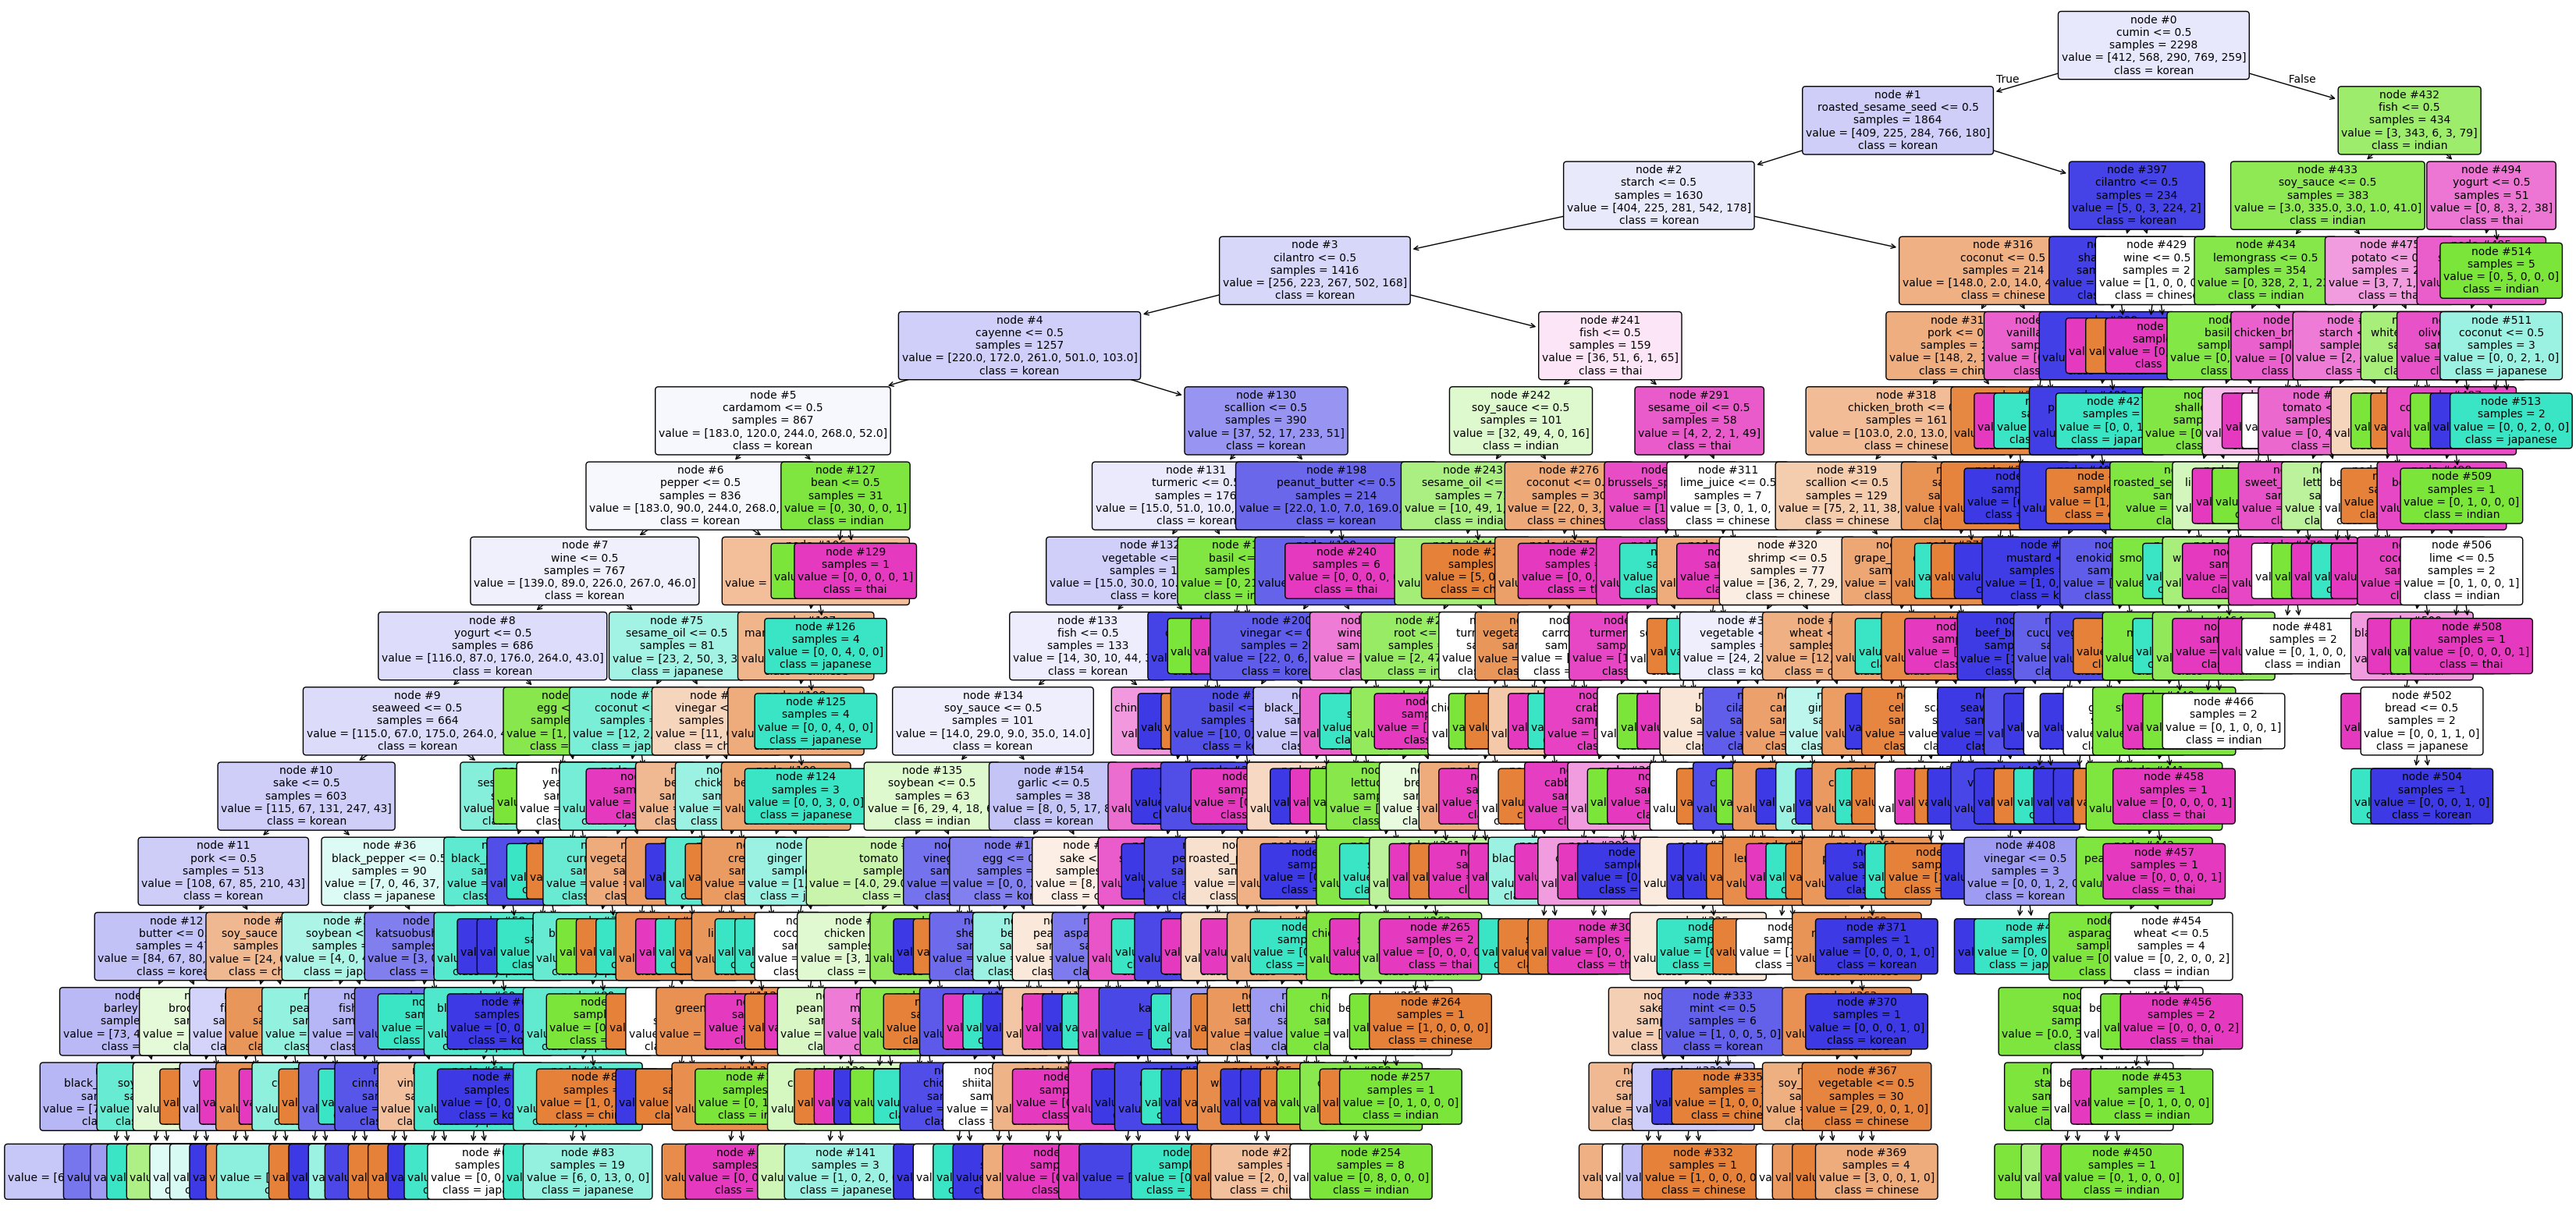

In [21]:
# export_graphviz(bamboo_train_tree,
#                 feature_names=list(bamboo_train_ingredients.columns.values),
#                 out_file="bamboo_train_tree.dot",
#                 class_names=np.unique(bamboo_train_cuisines),
#                 filled=True,
#                 node_ids=True,
#                 special_characters=True,
#                 impurity=False,
#                 label="all",
#                 leaves_parallel=False)

# with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
#     bamboo_train_tree_graph = bamboo_train_tree_image.read()
# graphviz.Source(bamboo_train_tree_graph)

plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_train_tree,
                   feature_names=list(bamboo_train_ingredients.columns.values),
                   class_names=np.unique(bamboo_train_cuisines),
                   filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()

Breakdown
1. Exporting the Tree (Commented Out)
This part of the code (currently commented out) does the following:

export_graphviz:

Exports the trained decision tree (bamboo_train_tree) to a file (bamboo_train_tree.dot) in DOT format. DOT files are used with Graphviz to create visual representations of graphs and trees.
Includes additional information, such as:
Feature names (feature_names=list(bamboo_train_ingredients.columns.values)): Labels for the input features.
Class names (class_names=np.unique(bamboo_train_cuisines)): Labels for the output classes.
Options like filled=True (color-coded nodes), node_ids=True (show node IDs), and impurity=False (hide impurity values).
Opening the DOT File:

Reads the DOT file as text using open().
Loads the file into Graphviz (graphviz.Source(bamboo_train_tree_graph)) for rendering the tree.
2. Visualizing the Tree with Matplotlib
This part creates a direct visualization in Python:

plt.figure(figsize=(40, 20)):

Sets the size of the visualization. Larger trees require more space, so the figure size is increased.
tree.plot_tree:

Draws the decision tree in the figure.
Key arguments:
bamboo_train_tree: The trained decision tree model.
feature_names: The names of the features used to train the tree.
class_names: The unique class labels (e.g., "Spam" and "Not Spam").
filled=True: Fills nodes with colors to represent different classes.
node_ids=True: Displays unique IDs for each node.
impurity=False: Hides the impurity measure (like Gini or entropy) from each node.
label="all": Displays additional information on nodes (like feature splits).
fontsize=10: Adjusts font size for readability.
rounded=True: Draws rounded edges around nodes.
plt.show():

Displays the tree plot in a new window or inline (if using a Jupyter notebook).
What Happens When You Run the Code
A large decision tree is drawn as a diagram, showing:
Feature splits at each node.
Class distributions in leaf nodes.
Color-coded nodes based on class.
The visualization helps you understand how the model makes decisions based on input data.
Why Two Methods?
Graphviz Export: Allows you to use external tools for more detailed visualizations or saving the tree as an image/PDF.
Matplotlib Plot: Quick, easy, and works entirely within Python.
Let me know if you'd like further clarification!









Now that you defined our tree to be deeper, more decision nodes are generated.

Now let's test our model on the test data.

In [22]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)


bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)
To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, we will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified. It also sheds some light on what cuisines are being confused with what other cuisines.

So let's go ahead and create the confusion matrix for how well the decision tree is able to correctly classify the recipes in bamboo_test.

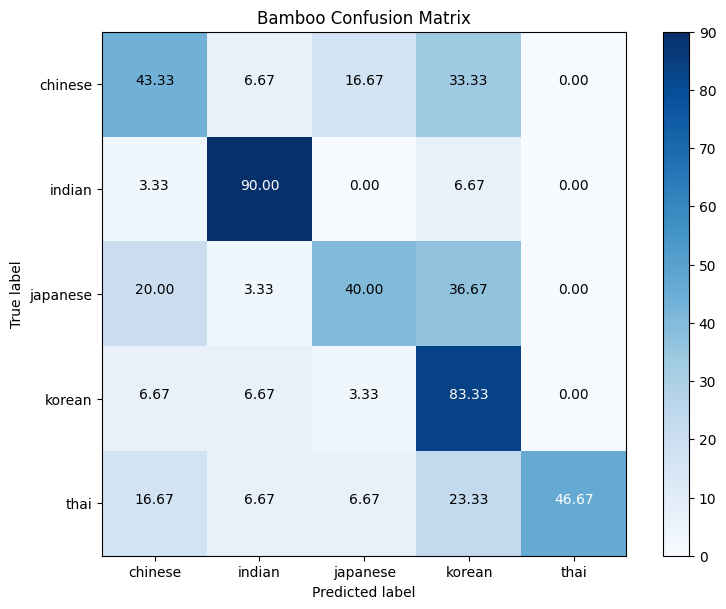

In [23]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

This code generates and visualizes a normalized confusion matrix to evaluate the performance of a classification model.

Key Concepts:
Confusion Matrix:

A table that shows how often your model's predictions match the actual classes.
Rows represent the true classes (actual labels).
Columns represent the predicted classes.
Normalized Confusion Matrix:

Each value in the confusion matrix is converted to a percentage of the total predictions for that row (true label). This makes it easier to compare performance, especially when classes are imbalanced.
Visualization:

The confusion matrix is displayed as a heatmap, where brighter or darker colors indicate the percentage of predictions in each cell.
Code Breakdown:
Unique Classes:

python
Copy
Edit
test_cuisines = np.unique(bamboo_test_cuisines)
Identifies all unique class labels (e.g., types of cuisines) in the test dataset.
Confusion Matrix:

python
Copy
Edit
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels=test_cuisines)
Computes the confusion matrix comparing the true labels (bamboo_test_cuisines) and predicted labels (bamboo_pred_cuisines).
Normalize the Matrix:

python
Copy
Edit
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
) * 100
Converts the raw counts in the matrix to percentages.
Divides each row by its total sum to represent the proportion of predictions for each true label.
Heatmap Plot:

python
Copy
Edit
plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
Creates a heatmap to visualize the confusion matrix, using a blue color map (cmap=plt.cm.Blues).
Labels and Ticks:

python
Copy
Edit
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)
Sets the x-axis and y-axis tick labels to the unique class names.
Annotating the Heatmap:

python
Copy
Edit
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")
Adds text inside each cell of the heatmap to show the exact percentage value.
If the value is above a threshold (thresh), the text color is white; otherwise, it’s black, for better contrast.
Titles and Labels:

python
Copy
Edit
plt.title(title)
plt.ylabel('True label')
plt.xlabel('Predicted label')
Sets the title and axis labels for clarity.
Display the Plot:

python
Copy
Edit
plt.show()
Displays the heatmap.
What the Output Shows:
A heatmap where each cell represents the percentage of predictions for a specific true-predicted label pair.
Diagonal cells (top-left to bottom-right) represent correct predictions. Off-diagonal cells show errors.
Brighter cells indicate higher percentages.
Why This is Useful:
Helps you understand where your model performs well and where it struggles (e.g., misclassifying one cuisine as another).
Normalized values make it easier to interpret results, especially when some classes have more samples than others.
Let me know if you'd like to tweak or enhance the visualization!









The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. According to this confusion matrix, we make the following observations:

Using the first row in the confusion matrix, 60% of the Chinese recipes in bamboo_test were correctly classified by our decision tree whereas 37% of the Chinese recipes were misclassified as Korean and 3% were misclassified as Indian.

Using the Indian row, 77% of the Indian recipes in bamboo_test were correctly classified by our decision tree and 3% of the Indian recipes were misclassified as Chinese and 13% were misclassified as Korean and 7% were misclassified as Thai.

Please note that because decision trees are created using random sampling of the datapoints in the training set, then you may not get the same results every time you create the decision tree even using the same training set. The performance should still be comparable though! So don't worry if you get slightly different numbers in your confusion matrix than the ones shown above.

Using the reference confusion matrix, how many Japanese recipes were correctly classified by our decision tree?

